<a href="https://colab.research.google.com/github/linyuehzzz/5526_neural_networks/blob/master/ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code provides some examples of how to train a deep neural network for the Fashion-MNIST database.  You can use this as a training/test harness for developing your own ConvNet.

Note that you will probably want to change your runtime to use GPU rather than CPU for this task, if you are on Colab.

In [37]:
# import standard PyTorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter # TensorBoard support


# import torchvision module to handle image manipulation
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

The following library call downloads the training set and puts it into data/FashionMNIST, and prepares the dataset to be passed into a pytorch as a tensor.

In [38]:
# Use standard FashionMNIST dataset
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)

test_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = False,
    download = False,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)

Here I'm defining a network that is a 2-layer DNN.  You will want to replace this with the ConvNet definitions.

In [39]:
# Build the neural network, expand on top of nn.Module
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # define layers
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(8, 12, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Linear(6*6*12, 256),
            nn.ReLU())
        self.fc = nn.Linear(in_features=256,out_features=10)

        # self.fc1 = nn.Linear(in_features=28*28,out_features=200)
        # self.fc2 = nn.Linear(in_features=200,out_features=10)


    # define forward function
    def forward(self, t):
        t = self.layer1(t)
        t = self.layer2(t)
        t = t.reshape(t.size(0), -1)
        t = self.layer3(t)
        t = self.fc(t)
        
        # # fc 1
        # t = t.reshape(-1, 28*28)
        # t = self.fc1(t)
        # t = F.relu(t)

        # # fc 2
        # t = self.fc2(t)
        # # don't need softmax here since we'll use cross-entropy as activation.

        return t

Auxiliary function that reports the accuracy on a dataset.

In [40]:
def get_accuracy(model,dataloader):
    count=0
    correct=0

    model.eval()
    with torch.no_grad():
        for batch in dataloader:
            images = batch[0]
            labels = batch[1]
            preds = network(images)
            batch_correct = preds.argmax(dim=1).eq(labels).sum().item()
            batch_count = len(batch[0])
            count += batch_count
            correct += batch_correct
    model.train()
    return correct/count

Train the model for three epochs (by default); report the training set accuracy after each epoch.

In [41]:
lr=0.001
batch_size=1000
shuffle=True
epochs=10

network = Network()
loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
optimizer = optim.Adam(network.parameters(), lr=lr)

# set the network to training mode
network.train()
for epoch in range(epochs):
    for batch in loader:
        images = batch[0]
        labels = batch[1]
        preds = network(images)
        loss = F.cross_entropy(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch {0}: train set accuracy {1}'.format(epoch,get_accuracy(network,loader)))

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)
print('Epoch {0}: test set accuracy {1}'.format(epoch,get_accuracy(network,test_loader)))

Epoch 0: train set accuracy 0.7433333333333333
Epoch 1: train set accuracy 0.7820833333333334
Epoch 2: train set accuracy 0.8067
Epoch 3: train set accuracy 0.8251333333333334
Epoch 4: train set accuracy 0.8361333333333333
Epoch 5: train set accuracy 0.84505
Epoch 6: train set accuracy 0.8536166666666667
Epoch 7: train set accuracy 0.8613666666666666
Epoch 8: train set accuracy 0.8676166666666667
Epoch 9: train set accuracy 0.873
Epoch 9: test set accuracy 0.866


Vary the kernel size for layer 2 and calculate its padding.

In [42]:
k = [3, 4, 5, 6, 7, 8]
for i in k:
    p = (i - 1) // 2
    print(i, p)

3 1
4 1
5 2
6 2
7 3
8 3


Plot figure

Text(0, 0.5, 'Accuracy')

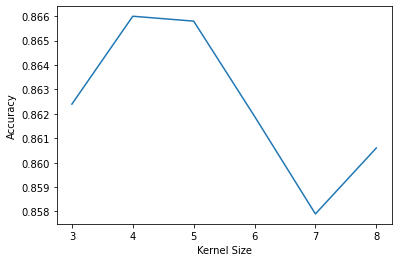

In [44]:
k = [3, 4, 5, 6, 7, 8]
acc = [0.8624, 0.866, 0.8658, 0.8619, 0.8579, 0.8606]
plt.plot(k, acc)
plt.xlabel('Kernel Size')
plt.ylabel('Accuracy')